In [ ]:

from pyspark.sql import SparkSession


spark = SparkSession.builder.appName("Healthcare Merge").getOrCreate()


providers_df = spark.read.csv('/content/healthcare_providers.csv', header=True, inferSchema=True)
claims_df = spark.read.csv('/content/healthcare_claims.csv', header=True, inferSchema=True)


providers_df.printSchema()
claims_df.printSchema()


root
 |-- provider_id: string (nullable = true)
 |-- provider_name: string (nullable = true)
 |-- specialty: string (nullable = true)
 |-- license_number: string (nullable = true)
 |-- years_of_experience: integer (nullable = true)
 |-- zip_code: integer (nullable = true)
 |-- state: string (nullable = true)
 |-- practice_size: string (nullable = true)
 |-- is_hospital_affiliated: integer (nullable = true)
 |-- electronic_system_type: string (nullable = true)
 |-- insurance_networks: string (nullable = true)
 |-- office_hours: string (nullable = true)
 |-- languages_spoken: string (nullable = true)
 |-- certification_dates: string (nullable = true)
 |-- rating: string (nullable = true)
 |-- patient_demographics: string (nullable = true)

root
 |-- claim_id: string (nullable = true)
 |-- provider_id: string (nullable = true)
 |-- claim_date: date (nullable = true)
 |-- submission_date: date (nullable = true)
 |-- patient_age: integer (nullable = true)
 |-- patient_gender: string (nullab

In [ ]:
!pip install pyspark


from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("HealthcareDataMerge").getOrCreate()


providers_path = "/content/healthcare_providers.csv"
claims_path = "/content/healthcare_claims.csv"


providers_df = spark.read.option("header", "true").csv(providers_path)
claims_df = spark.read.option("header", "true").csv(claims_path)

providers_df.printSchema()
claims_df.printSchema()

merged_df = providers_df.join(claims_df, on="provider_id", how="inner")


merged_df.show(truncate=False)


merged_output_path = "/content/merged_healthcare_data.csv"
merged_df.write.csv(merged_output_path, header=True)

root
 |-- provider_id: string (nullable = true)
 |-- provider_name: string (nullable = true)
 |-- specialty: string (nullable = true)
 |-- license_number: string (nullable = true)
 |-- years_of_experience: string (nullable = true)
 |-- zip_code: string (nullable = true)
 |-- state: string (nullable = true)
 |-- practice_size: string (nullable = true)
 |-- is_hospital_affiliated: string (nullable = true)
 |-- electronic_system_type: string (nullable = true)
 |-- insurance_networks: string (nullable = true)
 |-- office_hours: string (nullable = true)
 |-- languages_spoken: string (nullable = true)
 |-- certification_dates: string (nullable = true)
 |-- rating: string (nullable = true)
 |-- patient_demographics: string (nullable = true)

root
 |-- claim_id: string (nullable = true)
 |-- provider_id: string (nullable = true)
 |-- claim_date: string (nullable = true)
 |-- submission_date: string (nullable = true)
 |-- patient_age: string (nullable = true)
 |-- patient_gender: string (nullab

In [ ]:
import shutil
shutil.make_archive("/content/merged_healthcare_data", 'zip', "/content", "merged_healthcare_data.csv")

# Provide a download link for the CSV file
from google.colab import files
files.download("/content/merged_healthcare_data.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install pyspark
import matplotlib.pyplot as plt

from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("HealthcareDataVisualizations").getOrCreate()

merged_output_path = "/content/merged_healthcare_data.csv"
merged_df = spark.read.option("header", "true").csv(merged_output_path)


merged_pd_df = merged_df.toPandas()


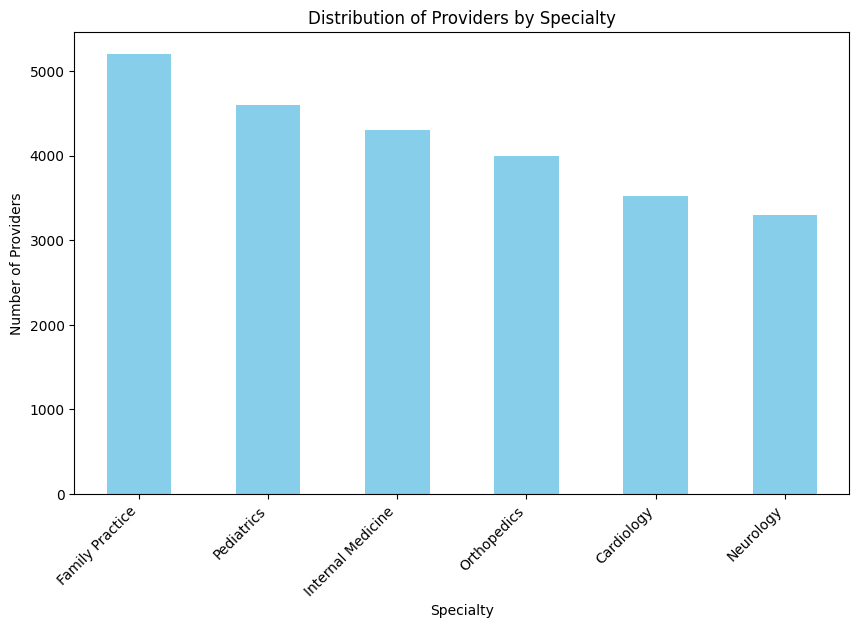

In [ ]:
plt.figure(figsize=(10,6))
specialty_counts = merged_pd_df['specialty'].value_counts()
specialty_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Providers by Specialty')
plt.xlabel('Specialty')
plt.ylabel('Number of Providers')
plt.xticks(rotation=45, ha='right')
plt.show()

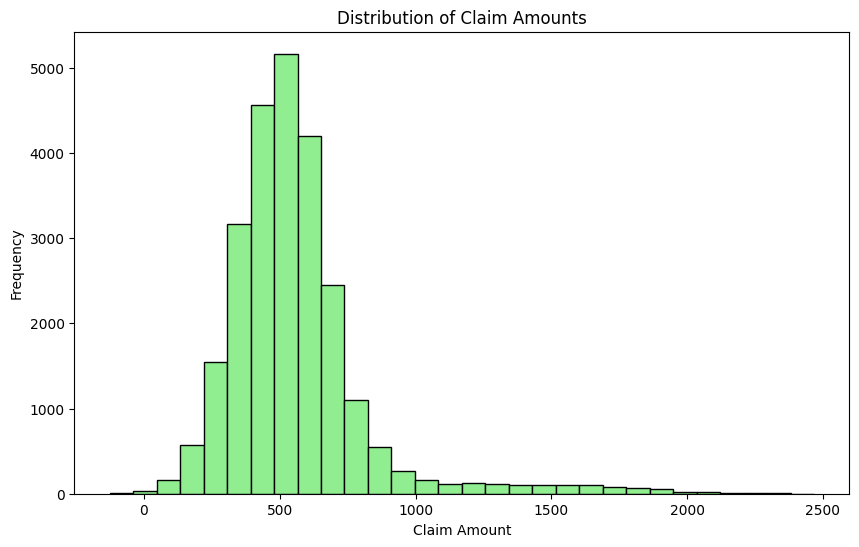

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotting the Claim Amount Distribution
plt.figure(figsize=(10,6))
merged_pd_df['claim_amount'] = pd.to_numeric(merged_pd_df['claim_amount'], errors='coerce')  # Ensure claim_amount is numeric
plt.hist(merged_pd_df['claim_amount'].dropna(), bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribution of Claim Amounts')
plt.xlabel('Claim Amount')
plt.ylabel('Frequency')
plt.show()


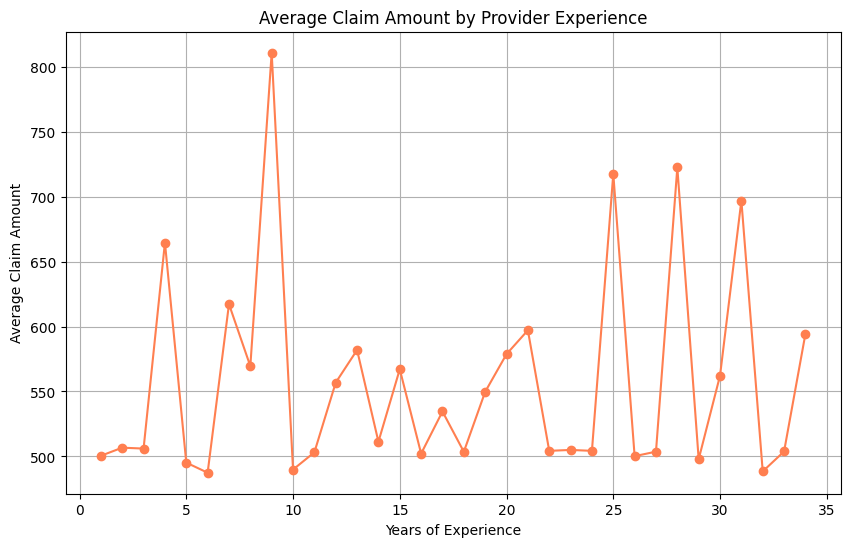

In [ ]:
merged_pd_df['years_of_experience'] = pd.to_numeric(merged_pd_df['years_of_experience'], errors='coerce')  # Ensure numeric
avg_claim_by_experience = merged_pd_df.groupby('years_of_experience')['claim_amount'].mean()
plt.figure(figsize=(10,6))
avg_claim_by_experience.plot(kind='line', marker='o', color='coral')
plt.title('Average Claim Amount by Provider Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Average Claim Amount')
plt.grid(True)
plt.show()


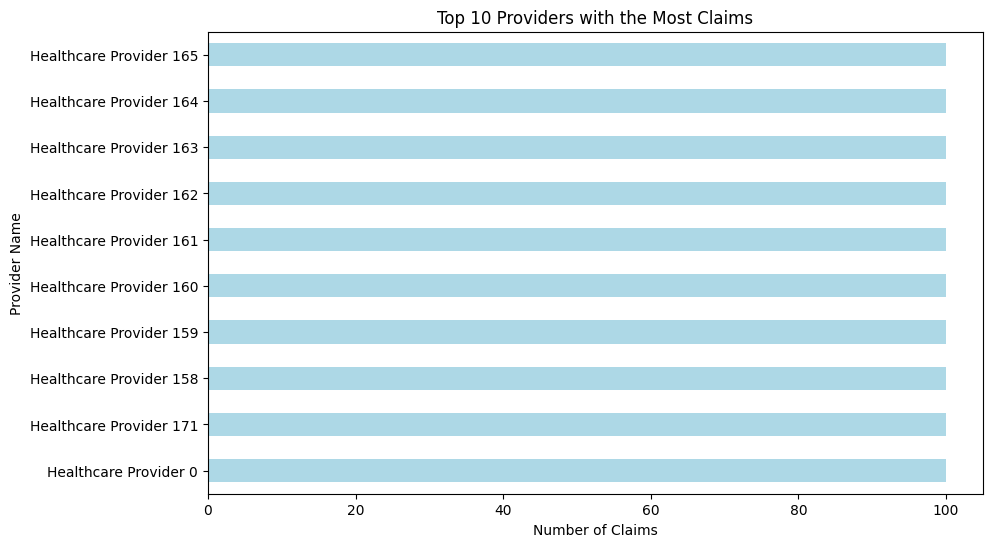

In [ ]:
top_providers = merged_pd_df['provider_name'].value_counts().nlargest(10)
plt.figure(figsize=(10,6))
top_providers.plot(kind='barh', color='lightblue')
plt.title('Top 10 Providers with the Most Claims')
plt.xlabel('Number of Claims')
plt.ylabel('Provider Name')
plt.show()

In [ ]:
# Check the available columns in the dataset
print(merged_pd_df.columns)




Index(['provider_id', 'provider_name', 'specialty', 'license_number',
       'years_of_experience', 'zip_code', 'state', 'practice_size',
       'is_hospital_affiliated', 'electronic_system_type',
       'insurance_networks', 'office_hours', 'languages_spoken',
       'certification_dates', 'rating', 'patient_demographics', 'claim_id',
       'claim_date', 'submission_date', 'patient_age', 'patient_gender',
       'diagnosis_codes', 'procedure_codes', 'claim_amount',
       'service_location', 'is_emergency', 'is_inpatient', 'medical_notes',
       'lab_results', 'medication_history', 'payment_status',
       'days_to_process', 'claim_type', 'referred_by', 'patient_vitals',
       'previous_visits', 'insurance_details'],
      dtype='object')


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert the PySpark DataFrame to a Pandas DataFrame
merged_pd_df = merged_df.toPandas()

# Select numeric columns only
numeric_columns = merged_pd_df.select_dtypes(include=['float64', 'int64'])

# Check if any numeric columns exist and have valid data
if numeric_columns.empty:
    print("No valid numeric columns found for correlation.")
else:
    # Drop columns with all NaN values
    numeric_columns = numeric_columns.dropna(axis=1, how='all')

    # Ensure there are still valid numeric columns after dropping NaNs
    if numeric_columns.empty:
        print("No valid data after dropping NaNs.")
    else:
        # Calculate the correlation matrix
        corr_matrix = numeric_columns.corr()

        # Plot the heatmap
        plt.figure(figsize=(12,8))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
        plt.title('Correlation Heatmap of Numeric Features')
        plt.show()



No valid numeric columns found for correlation.


In [ ]:

print(merged_pd_df.dtypes)



provider_id               object
provider_name             object
specialty                 object
license_number            object
years_of_experience       object
zip_code                  object
state                     object
practice_size             object
is_hospital_affiliated    object
electronic_system_type    object
insurance_networks        object
office_hours              object
languages_spoken          object
certification_dates       object
rating                    object
patient_demographics      object
claim_id                  object
claim_date                object
submission_date           object
patient_age               object
patient_gender            object
diagnosis_codes           object
procedure_codes           object
claim_amount              object
service_location          object
is_emergency              object
is_inpatient              object
medical_notes             object
lab_results               object
medication_history        object
payment_st

provider_id                object
provider_name              object
specialty                  object
license_number             object
years_of_experience         int64
zip_code                   object
state                      object
practice_size              object
is_hospital_affiliated     object
electronic_system_type     object
insurance_networks         object
office_hours               object
languages_spoken           object
certification_dates        object
rating                     object
patient_demographics       object
claim_id                   object
claim_date                 object
submission_date            object
patient_age                object
patient_gender             object
diagnosis_codes            object
procedure_codes            object
claim_amount              float64
service_location           object
is_emergency               object
is_inpatient               object
medical_notes              object
lab_results                object
medication_his

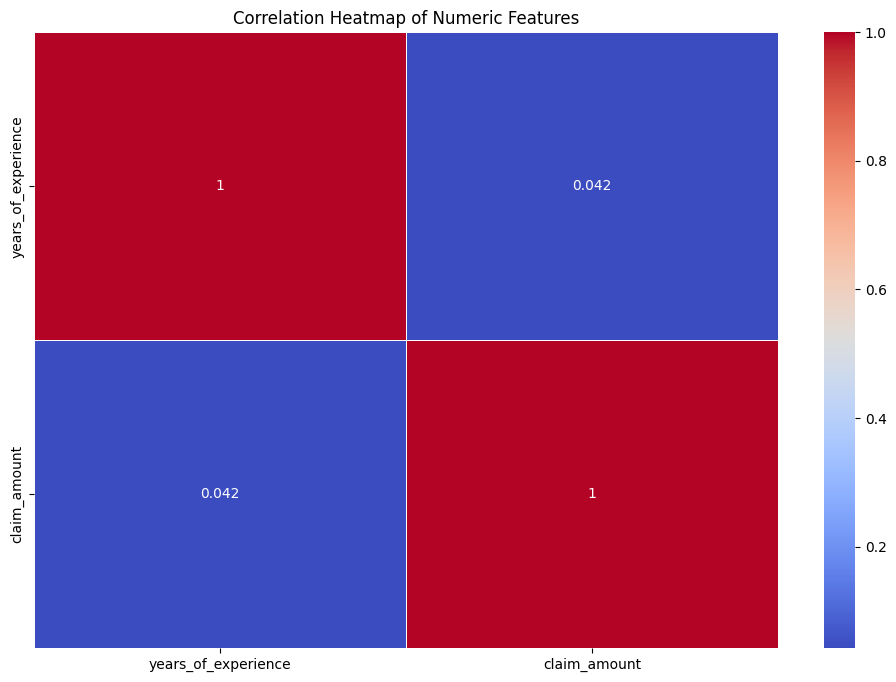

In [ ]:

columns_to_convert = ['years_of_experience', 'claim_amount', 'days_to_process']

for column in columns_to_convert:
    merged_pd_df[column] = pd.to_numeric(merged_pd_df[column], errors='coerce')


print(merged_pd_df.dtypes)

numeric_columns = merged_pd_df.select_dtypes(include=['float64', 'int64'])

if numeric_columns.empty:
    print("No valid numeric columns found for correlation.")
else:
    numeric_columns = numeric_columns.dropna(axis=1, how='all')

    if numeric_columns.empty:
        print("No valid data after dropping NaNs.")
    else:
        corr_matrix = numeric_columns.corr()


        plt.figure(figsize=(12,8))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
        plt.title('Correlation Heatmap of Numeric Features')
        plt.show()


In [ ]:
from pyspark.sql.functions import col
from pyspark.sql.types import DoubleType


cleaned_df = cleaned_df.na.fill({'years_of_experience': 0, 'claim_amount': 0, 'days_to_process': 0})


cleaned_df = cleaned_df.withColumn("years_of_experience", col("years_of_experience").cast(DoubleType()))
cleaned_df = cleaned_df.withColumn("claim_amount", col("claim_amount").cast(DoubleType()))
cleaned_df = cleaned_df.withColumn("days_to_process", col("days_to_process").cast(DoubleType()))


assembler = VectorAssembler(inputCols=["years_of_experience", "claim_amount", "days_to_process"], outputCol="features")
assembled_df = assembler.transform(cleaned_df)

assembled_df.select("features").show(truncate=False)

scaler = MinMaxScaler(inputCol="features", outputCol="scaled_features")
scaler_model = scaler.fit(assembled_df)
scaled_df = scaler_model.transform(assembled_df)


scaled_df.select("years_of_experience", "claim_amount", "days_to_process", "scaled_features").show(5)



+-----------------------------+
|features                     |
+-----------------------------+
|[15.0,409.9700012207031,0.0] |
|[15.0,601.739990234375,0.0]  |
|[15.0,676.9600219726562,0.0] |
|[15.0,450.67999267578125,0.0]|
|[15.0,616.27001953125,0.0]   |
|[15.0,404.989990234375,0.0]  |
|[15.0,521.4600219726562,0.0] |
|[15.0,441.8399963378906,0.0] |
|[15.0,538.6300048828125,0.0] |
|[15.0,744.9199829101562,0.0] |
|[15.0,376.989990234375,0.0]  |
|[15.0,605.739990234375,0.0]  |
|[15.0,469.3999938964844,0.0] |
|[15.0,508.6199951171875,0.0] |
|[15.0,544.8300170898438,0.0] |
|[15.0,595.2899780273438,0.0] |
|[15.0,499.8599853515625,0.0] |
|[15.0,453.44000244140625,0.0]|
|[15.0,442.5799865722656,0.0] |
|[15.0,409.0899963378906,0.0] |
+-----------------------------+
only showing top 20 rows

+-------------------+------------------+---------------+--------------------+
|years_of_experience|      claim_amount|days_to_process|     scaled_features|
+-------------------+------------------+----------

In [ ]:

if 'specialty_index' in scaled_df.columns:
    scaled_df = scaled_df.drop('specialty_index')


indexer = StringIndexer(inputCol="specialty", outputCol="specialty_index")
indexed_df = indexer.fit(scaled_df).transform(scaled_df)


encoder = OneHotEncoder(inputCol="specialty_index", outputCol="specialty_vec")
encoded_df = encoder.fit(indexed_df).transform(indexed_df)


encoded_df.select("specialty", "specialty_index", "specialty_vec").show(5)



+----------+---------------+-------------+
| specialty|specialty_index|specialty_vec|
+----------+---------------+-------------+
|Pediatrics|            1.0|(5,[1],[1.0])|
|Pediatrics|            1.0|(5,[1],[1.0])|
|Pediatrics|            1.0|(5,[1],[1.0])|
|Pediatrics|            1.0|(5,[1],[1.0])|
|Pediatrics|            1.0|(5,[1],[1.0])|
+----------+---------------+-------------+
only showing top 5 rows



In [ ]:
# Check distinct values in the specialty column
encoded_df.select("specialty").distinct().show()


+-----------------+
|        specialty|
+-----------------+
|  Family Practice|
|        Neurology|
|       Pediatrics|
|       Cardiology|
|Internal Medicine|
|      Orthopedics|
+-----------------+



In [ ]:

encoded_df.select("specialty", "specialty_index", "specialty_vec").distinct().show(truncate=False)


+-----------------+---------------+-------------+
|specialty        |specialty_index|specialty_vec|
+-----------------+---------------+-------------+
|Family Practice  |0.0            |(5,[0],[1.0])|
|Pediatrics       |1.0            |(5,[1],[1.0])|
|Orthopedics      |3.0            |(5,[3],[1.0])|
|Internal Medicine|2.0            |(5,[2],[1.0])|
|Neurology        |5.0            |(5,[],[])    |
|Cardiology       |4.0            |(5,[4],[1.0])|
+-----------------+---------------+-------------+



In [ ]:
from pyspark.ml.feature import StandardScaler, Bucketizer, VectorAssembler


if 'scaled_features' in expanded_lr_df.columns:
    expanded_lr_df = expanded_lr_df.drop('scaled_features')

scaler = StandardScaler(inputCol="expanded_features", outputCol="scaled_features", withMean=True, withStd=True)
scaler_model = scaler.fit(expanded_lr_df)
scaled_lr_df = scaler_model.transform(expanded_lr_df)

scaled_lr_df.select("scaled_features").show(5)

splits = [-float("inf"), 200, 500, float("inf")]
bucketizer = Bucketizer(splits=splits, inputCol="claim_amount", outputCol="claim_amount_bucket")

binned_df = bucketizer.transform(scaled_lr_df)

binned_df.select("claim_amount", "claim_amount_bucket").show(5)



+--------------------+
|     scaled_features|
+--------------------+
|[-0.2325515578891...|
|[-0.2325515578891...|
|[-0.2325515578891...|
|[-0.2325515578891...|
|[-0.2325515578891...|
+--------------------+
only showing top 5 rows

+------------------+-------------------+
|      claim_amount|claim_amount_bucket|
+------------------+-------------------+
| 409.9700012207031|                1.0|
|  601.739990234375|                2.0|
| 676.9600219726562|                2.0|
|450.67999267578125|                1.0|
|   616.27001953125|                2.0|
+------------------+-------------------+
only showing top 5 rows



In [ ]:

train_df, test_df = binned_df.randomSplit([0.8, 0.2], seed=12345)


print(f"Training set size: {train_df.count()}")
print(f"Test set size: {test_df.count()}")


Training set size: 19882
Test set size: 5042


In [ ]:
from pyspark.ml.feature import VectorAssembler


rf_assembler = VectorAssembler(inputCols=["years_of_experience", "claim_amount_bucket", "specialty_vec"], outputCol="features_rf")
rf_preprocessed_df = rf_assembler.transform(binned_df)


rf_preprocessed_df.select("features_rf").show(5)



+--------------------+
|         features_rf|
+--------------------+
|(7,[0,1,3],[15.0,...|
|(7,[0,1,3],[15.0,...|
|(7,[0,1,3],[15.0,...|
|(7,[0,1,3],[15.0,...|
|(7,[0,1,3],[15.0,...|
+--------------------+
only showing top 5 rows



In [ ]:

train_df, test_df = rf_preprocessed_df.randomSplit([0.8, 0.2], seed=12345)


train_df.select("features_rf").show(5)
test_df.select("features_rf").show(5)



+--------------------+
|         features_rf|
+--------------------+
|(7,[0,1,3],[15.0,...|
|(7,[0,1,3],[15.0,...|
|(7,[0,1,3],[15.0,...|
|(7,[0,3],[15.0,1.0])|
|(7,[0,1,3],[15.0,...|
+--------------------+
only showing top 5 rows

+--------------------+
|         features_rf|
+--------------------+
|(7,[0,1,3],[15.0,...|
|(7,[0,1,3],[15.0,...|
|(7,[0,1,3],[15.0,...|
|(7,[0,1,3],[15.0,...|
|(7,[0,1,3],[15.0,...|
+--------------------+
only showing top 5 rows



In [ ]:

train_df.printSchema()


root
 |-- provider_id: string (nullable = true)
 |-- specialty: string (nullable = true)
 |-- years_of_experience: double (nullable = false)
 |-- zip_code: string (nullable = true)
 |-- state: string (nullable = true)
 |-- practice_size: string (nullable = true)
 |-- is_hospital_affiliated: string (nullable = true)
 |-- electronic_system_type: string (nullable = true)
 |-- insurance_networks: string (nullable = true)
 |-- languages_spoken: string (nullable = true)
 |-- certification_dates: string (nullable = true)
 |-- rating: string (nullable = true)
 |-- patient_demographics: string (nullable = true)
 |-- claim_id: string (nullable = true)
 |-- claim_date: string (nullable = true)
 |-- submission_date: string (nullable = true)
 |-- patient_age: string (nullable = true)
 |-- patient_gender: string (nullable = true)
 |-- diagnosis_codes: string (nullable = true)
 |-- procedure_codes: string (nullable = true)
 |-- claim_amount: double (nullable = false)
 |-- service_location: string (nu

In [ ]:
from pyspark.sql import functions as F

merged_df = merged_df.withColumn("fraud_label",
                                 F.when((F.col("claim_amount") > 500) & (F.col("payment_status") == "denied"), 1).otherwise(0))

merged_df.select("claim_amount", "payment_status", "fraud_label").show(5)


+------------+--------------------+-----------+
|claim_amount|      payment_status|fraud_label|
+------------+--------------------+-----------+
|      409.97|""reference_range...|          0|
|      601.74|""reference_range...|          0|
|      676.96|""reference_range...|          0|
|      450.68|""reference_range...|          0|
|      616.27|""reference_range...|          0|
+------------+--------------------+-----------+
only showing top 5 rows



In [ ]:

merged_df.select("payment_status").distinct().show(truncate=False)


+----------------------------------+
|payment_status                    |
+----------------------------------+
|""reference_range"": ""1.23-7.71""|
|""reference_range"": ""1.96-6.77""|
|""reference_range"": ""2.12-6.72""|
|""reference_range"": ""4.19-6.14""|
|""reference_range"": ""4.7-8.41"" |
|""reference_range"": ""0.4-5.79"" |
|""reference_range"": ""2.48-7.19""|
|""reference_range"": ""2.61-5.17""|
|""reference_range"": ""1.25-7.02""|
|""reference_range"": ""0.52-5.89""|
|""reference_range"": ""0.07-9.62""|
|""reference_range"": ""1.64-7.89""|
|""reference_range"": ""0.89-6.98""|
|""reference_range"": ""1.18-8.09""|
|""reference_range"": ""1.29-8.34""|
|""reference_range"": ""2.14-9.61""|
|""reference_range"": ""3.63-7.32""|
|""reference_range"": ""3.85-8.14""|
|""reference_range"": ""1.2-9.35"" |
|""reference_range"": ""0.03-8.47""|
+----------------------------------+
only showing top 20 rows



In [ ]:

fraud_threshold = 500
merged_df = merged_df.withColumn("fraud_label",
                                 F.when(F.col("claim_amount") > fraud_threshold, 1).otherwise(0))


merged_df.select("claim_amount", "fraud_label").show(5)


+------------+-----------+
|claim_amount|fraud_label|
+------------+-----------+
|      409.97|          0|
|      601.74|          1|
|      676.96|          1|
|      450.68|          0|
|      616.27|          1|
+------------+-----------+
only showing top 5 rows



In [ ]:

train_df, test_df = merged_df.randomSplit([0.8, 0.2], seed=12345)


train_df.select("fraud_label").show(5)
test_df.select("fraud_label").show(5)


+-----------+
|fraud_label|
+-----------+
|          1|
|          1|
|          0|
|          0|
|          0|
+-----------+
only showing top 5 rows

+-----------+
|fraud_label|
+-----------+
|          1|
|          0|
|          0|
|          0|
|          1|
+-----------+
only showing top 5 rows



In [ ]:

merged_df.printSchema()


root
 |-- provider_id: string (nullable = true)
 |-- provider_name: string (nullable = true)
 |-- specialty: string (nullable = true)
 |-- license_number: string (nullable = true)
 |-- years_of_experience: string (nullable = true)
 |-- zip_code: string (nullable = true)
 |-- state: string (nullable = true)
 |-- practice_size: string (nullable = true)
 |-- is_hospital_affiliated: string (nullable = true)
 |-- electronic_system_type: string (nullable = true)
 |-- insurance_networks: string (nullable = true)
 |-- office_hours: string (nullable = true)
 |-- languages_spoken: string (nullable = true)
 |-- certification_dates: string (nullable = true)
 |-- rating: string (nullable = true)
 |-- patient_demographics: string (nullable = true)
 |-- claim_id: string (nullable = true)
 |-- claim_date: string (nullable = true)
 |-- submission_date: string (nullable = true)
 |-- patient_age: string (nullable = true)
 |-- patient_gender: string (nullable = true)
 |-- diagnosis_codes: string (nullable

In [ ]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder


indexer = StringIndexer(inputCol="specialty", outputCol="specialty_index")
indexed_df = indexer.fit(merged_df).transform(merged_df)

encoder = OneHotEncoder(inputCol="specialty_index", outputCol="specialty_vec")
encoded_df = encoder.fit(indexed_df).transform(indexed_df)


encoded_df.select("specialty", "specialty_index", "specialty_vec").show(5)


+----------+---------------+-------------+
| specialty|specialty_index|specialty_vec|
+----------+---------------+-------------+
|Pediatrics|            1.0|(5,[1],[1.0])|
|Pediatrics|            1.0|(5,[1],[1.0])|
|Pediatrics|            1.0|(5,[1],[1.0])|
|Pediatrics|            1.0|(5,[1],[1.0])|
|Pediatrics|            1.0|(5,[1],[1.0])|
+----------+---------------+-------------+
only showing top 5 rows



In [ ]:

encoded_df = encoded_df.withColumn("years_of_experience", encoded_df["years_of_experience"].cast("double"))
encoded_df = encoded_df.withColumn("claim_amount", encoded_df["claim_amount"].cast("double"))


encoded_df.select("years_of_experience", "claim_amount").printSchema()



root
 |-- years_of_experience: double (nullable = true)
 |-- claim_amount: double (nullable = true)



In [ ]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder


indexer = StringIndexer(inputCol="specialty", outputCol="specialty_index")
indexed_df = indexer.fit(merged_df).transform(merged_df)


encoder = OneHotEncoder(inputCol="specialty_index", outputCol="specialty_vec")
encoded_df = encoder.fit(indexed_df).transform(indexed_df)

encoded_df.select("specialty", "specialty_index", "specialty_vec").show(5)


+----------+---------------+-------------+
| specialty|specialty_index|specialty_vec|
+----------+---------------+-------------+
|Pediatrics|            1.0|(5,[1],[1.0])|
|Pediatrics|            1.0|(5,[1],[1.0])|
|Pediatrics|            1.0|(5,[1],[1.0])|
|Pediatrics|            1.0|(5,[1],[1.0])|
|Pediatrics|            1.0|(5,[1],[1.0])|
+----------+---------------+-------------+
only showing top 5 rows



In [ ]:

encoded_df.printSchema()


root
 |-- provider_id: string (nullable = true)
 |-- provider_name: string (nullable = true)
 |-- specialty: string (nullable = true)
 |-- license_number: string (nullable = true)
 |-- years_of_experience: string (nullable = true)
 |-- zip_code: string (nullable = true)
 |-- state: string (nullable = true)
 |-- practice_size: string (nullable = true)
 |-- is_hospital_affiliated: string (nullable = true)
 |-- electronic_system_type: string (nullable = true)
 |-- insurance_networks: string (nullable = true)
 |-- office_hours: string (nullable = true)
 |-- languages_spoken: string (nullable = true)
 |-- certification_dates: string (nullable = true)
 |-- rating: string (nullable = true)
 |-- patient_demographics: string (nullable = true)
 |-- claim_id: string (nullable = true)
 |-- claim_date: string (nullable = true)
 |-- submission_date: string (nullable = true)
 |-- patient_age: string (nullable = true)
 |-- patient_gender: string (nullable = true)
 |-- diagnosis_codes: string (nullable

In [ ]:

encoded_df = encoded_df.withColumn("years_of_experience", encoded_df["years_of_experience"].cast("double"))
encoded_df = encoded_df.withColumn("claim_amount", encoded_df["claim_amount"].cast("double"))

encoded_df.select("years_of_experience", "claim_amount").printSchema()



root
 |-- years_of_experience: double (nullable = true)
 |-- claim_amount: double (nullable = true)



In [ ]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder


indexer = StringIndexer(inputCol="specialty", outputCol="specialty_index")
encoded_train_df = indexer.fit(train_df).transform(train_df)
encoded_test_df = indexer.fit(test_df).transform(test_df)


encoder = OneHotEncoder(inputCol="specialty_index", outputCol="specialty_vec")
encoded_train_df = encoder.fit(encoded_train_df).transform(encoded_train_df)
encoded_test_df = encoder.fit(encoded_test_df).transform(encoded_test_df)

encoded_train_df.select("specialty", "specialty_index", "specialty_vec").show(5)
encoded_test_df.select("specialty", "specialty_index", "specialty_vec").show(5)


+----------+---------------+-------------+
| specialty|specialty_index|specialty_vec|
+----------+---------------+-------------+
|Pediatrics|            1.0|(5,[1],[1.0])|
|Pediatrics|            1.0|(5,[1],[1.0])|
|Pediatrics|            1.0|(5,[1],[1.0])|
|Pediatrics|            1.0|(5,[1],[1.0])|
|Pediatrics|            1.0|(5,[1],[1.0])|
+----------+---------------+-------------+
only showing top 5 rows

+----------+---------------+-------------+
| specialty|specialty_index|specialty_vec|
+----------+---------------+-------------+
|Pediatrics|            1.0|(5,[1],[1.0])|
|Pediatrics|            1.0|(5,[1],[1.0])|
|Pediatrics|            1.0|(5,[1],[1.0])|
|Pediatrics|            1.0|(5,[1],[1.0])|
|Pediatrics|            1.0|(5,[1],[1.0])|
+----------+---------------+-------------+
only showing top 5 rows



In [ ]:

encoded_train_df = encoded_train_df.withColumn("years_of_experience", encoded_train_df["years_of_experience"].cast("double"))
encoded_train_df = encoded_train_df.withColumn("claim_amount", encoded_train_df["claim_amount"].cast("double"))

encoded_test_df = encoded_test_df.withColumn("years_of_experience", encoded_test_df["years_of_experience"].cast("double"))
encoded_test_df = encoded_test_df.withColumn("claim_amount", encoded_test_df["claim_amount"].cast("double"))


encoded_train_df.select("years_of_experience", "claim_amount").printSchema()
encoded_test_df.select("years_of_experience", "claim_amount").printSchema()


root
 |-- years_of_experience: double (nullable = true)
 |-- claim_amount: double (nullable = true)

root
 |-- years_of_experience: double (nullable = true)
 |-- claim_amount: double (nullable = true)



In [ ]:
from pyspark.ml.feature import VectorAssembler

rf_assembler = VectorAssembler(inputCols=["years_of_experience", "claim_amount", "specialty_vec"], outputCol="features_rf")
rf_train_df = rf_assembler.transform(encoded_train_df)
rf_test_df = rf_assembler.transform(encoded_test_df)

rf_train_df.select("features_rf").show(5)
rf_test_df.select("features_rf").show(5)


+--------------------+
|         features_rf|
+--------------------+
|(7,[0,1,3],[15.0,...|
|(7,[0,1,3],[15.0,...|
|(7,[0,1,3],[15.0,...|
|(7,[0,1,3],[15.0,...|
|(7,[0,1,3],[15.0,...|
+--------------------+
only showing top 5 rows

+--------------------+
|         features_rf|
+--------------------+
|(7,[0,1,3],[15.0,...|
|(7,[0,1,3],[15.0,...|
|(7,[0,1,3],[15.0,...|
|(7,[0,1,3],[15.0,...|
|(7,[0,1,3],[15.0,...|
+--------------------+
only showing top 5 rows



In [ ]:
from pyspark.ml.feature import VectorAssembler


rf_assembler = VectorAssembler(inputCols=["years_of_experience", "claim_amount", "specialty_vec"], outputCol="features_rf")


rf_train_df = rf_assembler.transform(encoded_train_df)
rf_test_df = rf_assembler.transform(encoded_test_df)


rf_train_df.select("features_rf").show(5)



+--------------------+
|         features_rf|
+--------------------+
|(7,[0,1,3],[15.0,...|
|(7,[0,1,3],[15.0,...|
|(7,[0,1,3],[15.0,...|
|(7,[0,1,3],[15.0,...|
|(7,[0,1,3],[15.0,...|
+--------------------+
only showing top 5 rows



In [ ]:

encoded_df = encoded_df.fillna({"years_of_experience": 0, "claim_amount": 0})



In [ ]:

encoded_df = encoded_df.na.drop(subset=["specialty_vec"])


In [ ]:

encoded_df.select("years_of_experience", "claim_amount", "specialty_vec").show(5)


+-------------------+------------+-------------+
|years_of_experience|claim_amount|specialty_vec|
+-------------------+------------+-------------+
|               15.0|      409.97|(5,[1],[1.0])|
|               15.0|      601.74|(5,[1],[1.0])|
|               15.0|      676.96|(5,[1],[1.0])|
|               15.0|      450.68|(5,[1],[1.0])|
|               15.0|      616.27|(5,[1],[1.0])|
+-------------------+------------+-------------+
only showing top 5 rows



In [ ]:
encoded_df.printSchema()


root
 |-- provider_id: string (nullable = true)
 |-- provider_name: string (nullable = true)
 |-- specialty: string (nullable = true)
 |-- license_number: string (nullable = true)
 |-- years_of_experience: double (nullable = false)
 |-- zip_code: string (nullable = true)
 |-- state: string (nullable = true)
 |-- practice_size: string (nullable = true)
 |-- is_hospital_affiliated: string (nullable = true)
 |-- electronic_system_type: string (nullable = true)
 |-- insurance_networks: string (nullable = true)
 |-- office_hours: string (nullable = true)
 |-- languages_spoken: string (nullable = true)
 |-- certification_dates: string (nullable = true)
 |-- rating: string (nullable = true)
 |-- patient_demographics: string (nullable = true)
 |-- claim_id: string (nullable = true)
 |-- claim_date: string (nullable = true)
 |-- submission_date: string (nullable = true)
 |-- patient_age: string (nullable = true)
 |-- patient_gender: string (nullable = true)
 |-- diagnosis_codes: string (nullabl

In [ ]:
encoded_df.select("years_of_experience", "claim_amount", "specialty_vec").filter(
    (encoded_df["years_of_experience"].isNull()) |
    (encoded_df["claim_amount"].isNull()) |
    (encoded_df["specialty_vec"].isNull())
).show()


+-------------------+------------+-------------+
|years_of_experience|claim_amount|specialty_vec|
+-------------------+------------+-------------+
+-------------------+------------+-------------+



In [ ]:

encoded_df.filter(encoded_df["years_of_experience"].isNull() |
                  encoded_df["claim_amount"].isNull() |
                  encoded_df["specialty_vec"].isNull()).show()



+-----------+-------------+---------+--------------+-------------------+--------+-----+-------------+----------------------+----------------------+------------------+------------+----------------+-------------------+------+--------------------+--------+----------+---------------+-----------+--------------+---------------+---------------+------------+----------------+------------+------------+-------------+-----------+------------------+--------------+---------------+----------+-----------+--------------+---------------+-----------------+-----------+---------------+-------------+
|provider_id|provider_name|specialty|license_number|years_of_experience|zip_code|state|practice_size|is_hospital_affiliated|electronic_system_type|insurance_networks|office_hours|languages_spoken|certification_dates|rating|patient_demographics|claim_id|claim_date|submission_date|patient_age|patient_gender|diagnosis_codes|procedure_codes|claim_amount|service_location|is_emergency|is_inpatient|medical_notes|lab_r

In [ ]:

clean_df = encoded_df.dropna(subset=["years_of_experience", "claim_amount", "specialty_vec"])


clean_df.filter(clean_df["years_of_experience"].isNull() |
                clean_df["claim_amount"].isNull() |
                clean_df["specialty_vec"].isNull()).show()


+-----------+-------------+---------+--------------+-------------------+--------+-----+-------------+----------------------+----------------------+------------------+------------+----------------+-------------------+------+--------------------+--------+----------+---------------+-----------+--------------+---------------+---------------+------------+----------------+------------+------------+-------------+-----------+------------------+--------------+---------------+----------+-----------+--------------+---------------+-----------------+-----------+---------------+-------------+
|provider_id|provider_name|specialty|license_number|years_of_experience|zip_code|state|practice_size|is_hospital_affiliated|electronic_system_type|insurance_networks|office_hours|languages_spoken|certification_dates|rating|patient_demographics|claim_id|claim_date|submission_date|patient_age|patient_gender|diagnosis_codes|procedure_codes|claim_amount|service_location|is_emergency|is_inpatient|medical_notes|lab_r

In [ ]:
from pyspark.ml.feature import VectorAssembler


rf_assembler = VectorAssembler(inputCols=["years_of_experience", "claim_amount", "specialty_vec"], outputCol="features_rf")
rf_train_df = rf_assembler.transform(clean_df)


rf_train_df.select("features_rf").show(5)


+--------------------+
|         features_rf|
+--------------------+
|(7,[0,1,3],[15.0,...|
|(7,[0,1,3],[15.0,...|
|(7,[0,1,3],[15.0,...|
|(7,[0,1,3],[15.0,...|
|(7,[0,1,3],[15.0,...|
+--------------------+
only showing top 5 rows



In [ ]:

train_df, test_df = clean_df.randomSplit([0.8, 0.2], seed=12345)


train_df.select("fraud_label").show(5)
test_df.select("fraud_label").show(5)


+-----------+
|fraud_label|
+-----------+
|          1|
|          1|
|          0|
|          0|
|          0|
+-----------+
only showing top 5 rows

+-----------+
|fraud_label|
+-----------+
|          1|
|          0|
|          0|
|          0|
|          1|
+-----------+
only showing top 5 rows



In [ ]:
from pyspark.ml.feature import VectorAssembler

rf_assembler = VectorAssembler(inputCols=["years_of_experience", "claim_amount", "specialty_vec"], outputCol="features_rf")
train_df = rf_assembler.transform(train_df)

train_df.select("features_rf").show(5)



+--------------------+
|         features_rf|
+--------------------+
|(7,[0,1,3],[15.0,...|
|(7,[0,1,3],[15.0,...|
|(7,[0,1,3],[15.0,...|
|(7,[0,1,3],[15.0,...|
|(7,[0,1,3],[15.0,...|
+--------------------+
only showing top 5 rows



In [ ]:
train_df.printSchema()


root
 |-- provider_id: string (nullable = true)
 |-- provider_name: string (nullable = true)
 |-- specialty: string (nullable = true)
 |-- license_number: string (nullable = true)
 |-- years_of_experience: double (nullable = false)
 |-- zip_code: string (nullable = true)
 |-- state: string (nullable = true)
 |-- practice_size: string (nullable = true)
 |-- is_hospital_affiliated: string (nullable = true)
 |-- electronic_system_type: string (nullable = true)
 |-- insurance_networks: string (nullable = true)
 |-- office_hours: string (nullable = true)
 |-- languages_spoken: string (nullable = true)
 |-- certification_dates: string (nullable = true)
 |-- rating: string (nullable = true)
 |-- patient_demographics: string (nullable = true)
 |-- claim_id: string (nullable = true)
 |-- claim_date: string (nullable = true)
 |-- submission_date: string (nullable = true)
 |-- patient_age: string (nullable = true)
 |-- patient_gender: string (nullable = true)
 |-- diagnosis_codes: string (nullabl

In [ ]:
from pyspark.ml.classification import RandomForestClassifier


rf_classifier = RandomForestClassifier(labelCol="fraud_label", featuresCol="features_rf")
rf_model = rf_classifier.fit(train_df)


In [ ]:

rf_test_df = rf_assembler.transform(test_df)


rf_test_predictions = rf_model.transform(rf_test_df)


rf_test_predictions.select("fraud_label", "prediction", "probability").show(5)


+-----------+----------+--------------------+
|fraud_label|prediction|         probability|
+-----------+----------+--------------------+
|          1|       1.0|           [0.0,1.0]|
|          0|       0.0|[0.99280823236078...|
|          0|       0.0|[0.99280823236078...|
|          0|       0.0|[0.99280823236078...|
|          1|       1.0|           [0.0,1.0]|
+-----------+----------+--------------------+
only showing top 5 rows



In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator


evaluator = MulticlassClassificationEvaluator(labelCol="fraud_label", predictionCol="prediction", metricName="accuracy")

In [ ]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.sql.functions import col


rf_classifier = RandomForestClassifier(labelCol="fraud_label", featuresCol="features_rf")
rf_model = rf_classifier.fit(train_df)


rf_test_df = rf_assembler.transform(test_df)
rf_test_predictions = rf_model.transform(rf_test_df)

rf_test_predictions.select("fraud_label", "prediction", "probability").show(5)

fraudulent_df = rf_test_predictions.filter(col("prediction") == 1.0)
non_fraudulent_df = rf_test_predictions.filter(col("prediction") == 0.0)



In [ ]:
accuracy = evaluator.evaluate(rf_test_predictions)
print(f"Test Accuracy = {accuracy}")


precision_evaluator = MulticlassClassificationEvaluator(labelCol="fraud_label", predictionCol="prediction", metricName="weightedPrecision")
precision = precision_evaluator.evaluate(rf_test_predictions)
print(f"Test Precision = {precision}")

Test Accuracy = 0.9849266164220547
Test Precision = 0.9851558573283842


In [ ]:
recall_evaluator = MulticlassClassificationEvaluator(labelCol="fraud_label", predictionCol="prediction", metricName="weightedRecall")
recall = recall_evaluator.evaluate(rf_test_predictions)
print(f"Test Recall = {recall}")

Test Recall = 0.9849266164220547


In [ ]:
f1_evaluator = MulticlassClassificationEvaluator(labelCol="fraud_label", predictionCol="prediction", metricName="f1")
f1 = f1_evaluator.evaluate(rf_test_predictions)
print(f"Test F1-score = {f1}")

Test F1-score = 0.9849362107585853


In [ ]:
from pyspark.sql import functions as F


prediction_and_labels = rf_test_predictions.select("fraud_label", "prediction")


TP = prediction_and_labels.filter((F.col("fraud_label") == 1) & (F.col("prediction") == 1)).count()

FP = prediction_and_labels.filter((F.col("fraud_label") == 0) & (F.col("prediction") == 1)).count()


TN = prediction_and_labels.filter((F.col("fraud_label") == 0) & (F.col("prediction") == 0)).count()


FN = prediction_and_labels.filter((F.col("fraud_label") == 1) & (F.col("prediction") == 0)).count()

print(f"Confusion Matrix:")
print(f"TP: {TP}, FP: {FP}, TN: {TN}, FN: {FN}")


Confusion Matrix:
TP: 2638, FP: 12, TN: 2328, FN: 64


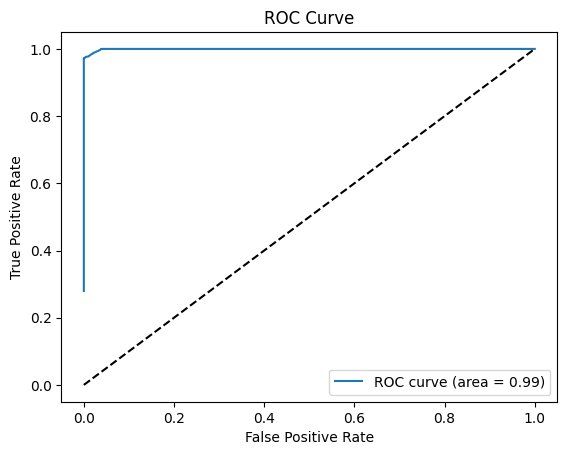

In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
import matplotlib.pyplot as plt
import numpy as np


evaluator = BinaryClassificationEvaluator(labelCol="fraud_label", rawPredictionCol="prediction", metricName="areaUnderROC")
roc_auc = evaluator.evaluate(rf_test_predictions)


preds_df = rf_test_predictions.select("fraud_label", "probability").toPandas()


fprs = []
tprs = []
thresholds = np.linspace(0, 1, 100)

for threshold in thresholds:
    preds_df['pred_label'] = preds_df['probability'].apply(lambda x: 1 if x[1] >= threshold else 0)
    TP = len(preds_df[(preds_df['fraud_label'] == 1) & (preds_df['pred_label'] == 1)])
    TN = len(preds_df[(preds_df['fraud_label'] == 0) & (preds_df['pred_label'] == 0)])
    FP = len(preds_df[(preds_df['fraud_label'] == 0) & (preds_df['pred_label'] == 1)])
    FN = len(preds_df[(preds_df['fraud_label'] == 1) & (preds_df['pred_label'] == 0)])

    tpr = TP / (TP + FN)
    fpr = FP / (FP + TN)

    tprs.append(tpr)
    fprs.append(fpr)


plt.plot(fprs, tprs, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()


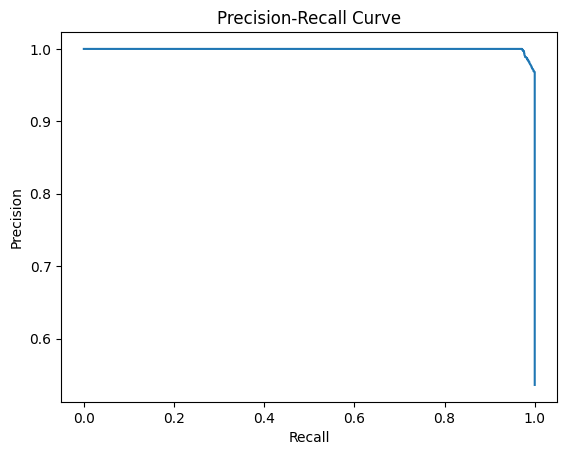

In [ ]:
from sklearn.metrics import precision_recall_curve

preds_df = rf_test_predictions.select("fraud_label", "probability").toPandas()


precision, recall, _ = precision_recall_curve(preds_df["fraud_label"], preds_df["probability"].apply(lambda x: x[1]))

plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


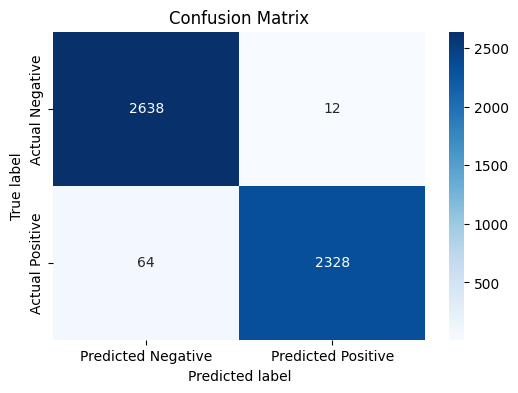

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

confusion_matrix = [[2638, 12], [64, 2328]]


plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted Negative", "Predicted Positive"], yticklabels=["Actual Negative", "Actual Positive"])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
pandas_df.to_csv('cleaned_data.csv', index=False)


In [ ]:
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql.functions import udf
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.linalg import Vectors, VectorUDT
import time

file_path = '/content/cleaned_data.xlsx'
data = pd.read_excel(file_path)


expected_length = 3
data['features_rf'] = data['features_rf'].apply(lambda x: list(eval(x)[2]) if len(eval(x)[2]) == expected_length else [0.0] * expected_length)

spark = SparkSession.builder.appName("RandomForestRuntime").getOrCreate()


data_spark = spark.createDataFrame(data)

def array_to_vector(array):
    return Vectors.dense(array)


array_to_vector_udf = udf(array_to_vector, VectorUDT())
data_spark = data_spark.withColumn("features", array_to_vector_udf("features_rf"))

train_df, test_df = data_spark.randomSplit([0.7, 0.3], seed=42)


rf_classifier = RandomForestClassifier(labelCol="fraud_label", featuresCol="features")


start_time = time.time()
rf_model = rf_classifier.fit(train_df)
end_time = time.time()


runtime = end_time - start_time
print(f"Random Forest Training Runtime: {runtime} seconds")


Random Forest Training Runtime: 15.895964622497559 seconds


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import udf
from pyspark.ml.regression import LinearRegression
from pyspark.ml.linalg import Vectors, VectorUDT
import pandas as pd
import time

data = pd.read_excel(file_path)+
expected_length = 3
data['features_rf'] = data['features_rf'].apply(lambda x: list(eval(x)[2]) if len(eval(x)[2]) == expected_length else [0.0] * expected_length)


spark = SparkSession.builder.appName("LinearRegressionFraudPrediction").getOrCreate()

data_spark = spark.createDataFrame(data)


def array_to_vector(array):
    return Vectors.dense(array)


array_to_vector_udf = udf(array_to_vector, VectorUDT())
data_spark = data_spark.withColumn("features", array_to_vector_udf("features_rf"))

train_df, test_df = data_spark.randomSplit([0.7, 0.3], seed=42)


lr = LinearRegression(labelCol="fraud_label", featuresCol="features")


start_time = time.time()
lr_model = lr.fit(train_df)
end_time = time.time()

runtime = end_time - start_time
print(f"Linear Regression Training Runtime: {runtime} seconds")


test_predictions = lr_model.transform(test_df)

test_predictions.select("fraud_label", "prediction").show(10)


Linear Regression Training Runtime: 6.169198751449585 seconds
+-----------+-------------------+
|fraud_label|         prediction|
+-----------+-------------------+
|          0|  0.337578579391662|
|          1| 0.7125843492740083|
|          0| 0.4074775660436123|
|          0|0.48269278052101805|
|          1| 0.6440261811444072|
|          1| 0.6884260927397483|
|          0| 0.4156636159695348|
|          0|0.27800624767499893|
|          0|  0.226067172282939|
|          0|0.46583845646376665|
+-----------+-------------------+
only showing top 10 rows



In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.sql.functions import when

threshold = 0.5
test_predictions = test_predictions.withColumn("binary_prediction", when(test_predictions["prediction"] >= threshold, 1).otherwise(0))


evaluator_accuracy = BinaryClassificationEvaluator(labelCol="fraud_label", rawPredictionCol="binary_prediction", metricName="areaUnderROC")
evaluator_precision = BinaryClassificationEvaluator(labelCol="fraud_label", rawPredictionCol="binary_prediction", metricName="areaUnderPR")

tp = test_predictions.filter((test_predictions["fraud_label"] == 1) & (test_predictions["binary_prediction"] == 1)).count()
fp = test_predictions.filter((test_predictions["fraud_label"] == 0) & (test_predictions["binary_prediction"] == 1)).count()
fn = test_predictions.filter((test_predictions["fraud_label"] == 1) & (test_predictions["binary_prediction"] == 0)).count()
tn = test_predictions.filter((test_predictions["fraud_label"] == 0) & (test_predictions["binary_prediction"] == 0)).count()


accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0


print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")


Accuracy: 0.9019036185902932
Precision: 0.8843740663280549
Recall: 0.9411764705882353
F1 Score: 0.9118915588416511


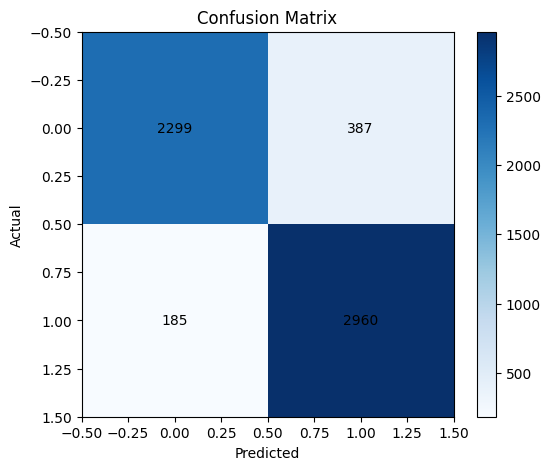

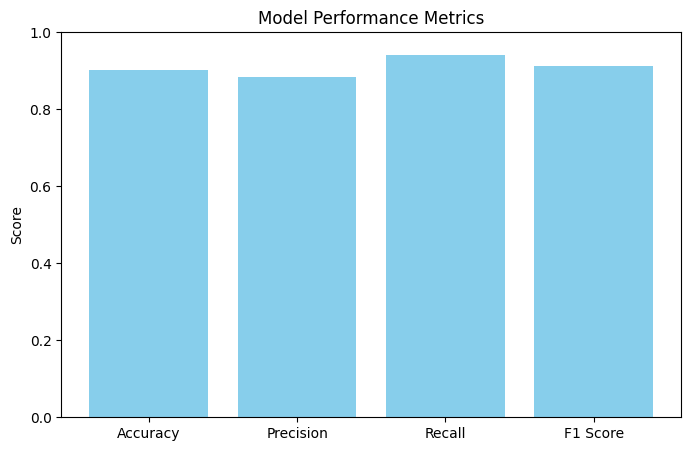

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.sql.functions import when

threshold = 0.5
test_predictions = test_predictions.withColumn("binary_prediction", when(test_predictions["prediction"] >= threshold, 1).otherwise(0))


tp = test_predictions.filter((test_predictions["fraud_label"] == 1) & (test_predictions["binary_prediction"] == 1)).count()
fp = test_predictions.filter((test_predictions["fraud_label"] == 0) & (test_predictions["binary_prediction"] == 1)).count()
fn = test_predictions.filter((test_predictions["fraud_label"] == 1) & (test_predictions["binary_prediction"] == 0)).count()
tn = test_predictions.filter((test_predictions["fraud_label"] == 0) & (test_predictions["binary_prediction"] == 0)).count()


accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0


confusion_matrix = pd.DataFrame([[tn, fp], [fn, tp]], columns=["Predicted 0", "Predicted 1"], index=["Actual 0", "Actual 1"])
plt.figure(figsize=(6, 5))
plt.title("Confusion Matrix")
plt.imshow(confusion_matrix, cmap='Blues', aspect='auto')
for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion_matrix.iloc[i, j], ha='center', va='center', color='black')
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

metrics = {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1 Score": f1_score}
plt.figure(figsize=(8, 5))
plt.title("Model Performance Metrics")
plt.bar(metrics.keys(), metrics.values(), color='skyblue')
plt.ylim(0, 1)
plt.ylabel("Score")
plt.show()
